In [1]:
import os, sys, importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..")
MODULES_PATH = os.path.join(BASE_PATH, "modules")
DATASET_PATH = os.path.join(BASE_PATH, "datasets", "regression", "insurance_forecast.csv")

In [3]:
sys.path.append(MODULES_PATH)

# Inspect data

In [4]:
data = pd.read_csv(DATASET_PATH)

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Check data
# Charges needed to be normalized
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Missing data?
data.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

Text(0.5, 1.0, 'Distribution of charges')

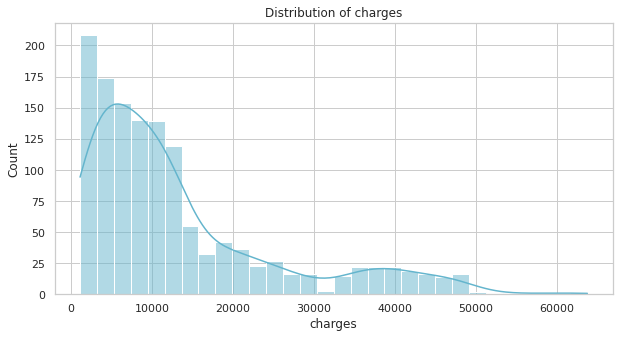

In [8]:
sns.set(style="whitegrid")
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.histplot(data["charges"], kde=True, color="c")
plt.title("Distribution of charges")

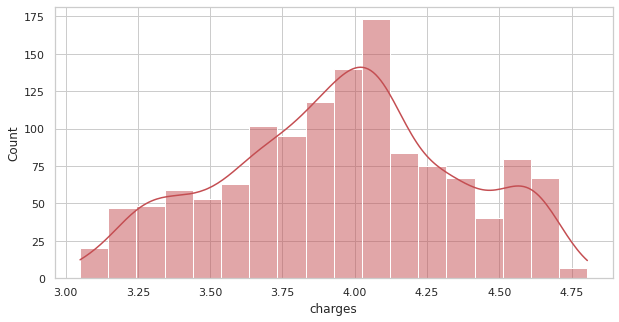

In [9]:
# Use log transformation to make distribution closer to normal distribution
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.histplot(np.log10(data["charges"]), kde=True, color='r')

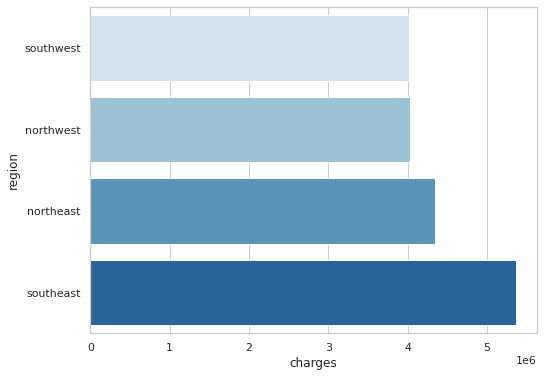

In [10]:
# Highest charges in southeas
charges = data["charges"].groupby(data.region).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x=charges.head(), y=charges.head().index, palette="Blues")

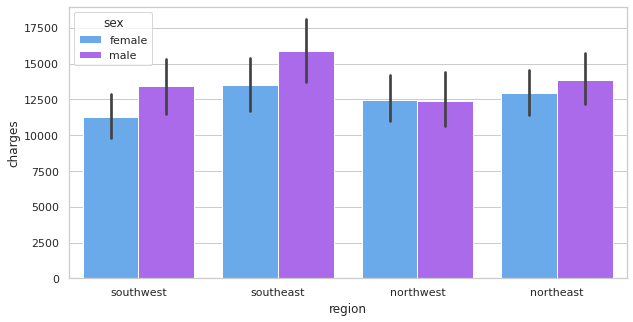

In [11]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.barplot(x="region", y="charges", hue="sex", data=data, palette="cool")

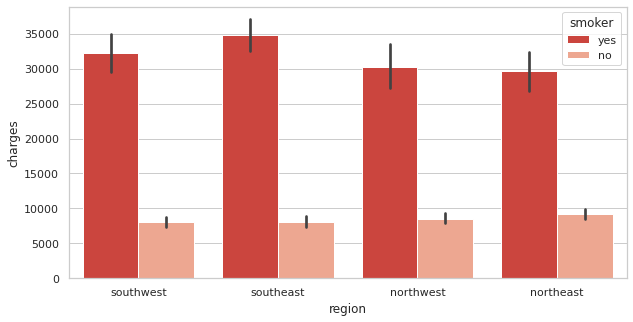

In [12]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.barplot(x="region", y="charges", data=data, hue="smoker", palette="Reds_r")

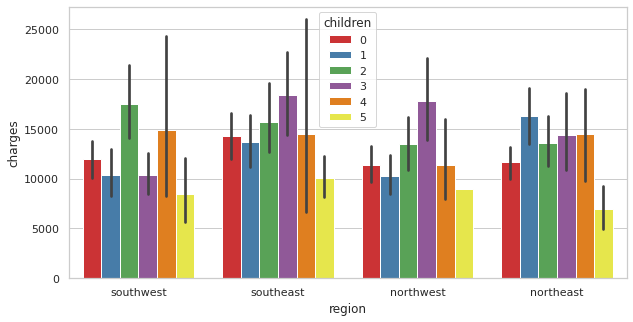

In [13]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.barplot(x="region", y="charges", hue="children", data=data, palette="Set1")

## Smoking as a charging factor

In [14]:
print("Smokers: " + str(np.sum(data["smoker"] == "yes")))
print("Non-Smoker: " + str(np.sum(data["smoker"] == "no")))

Smokers: 274
Non-Smoker: 1064


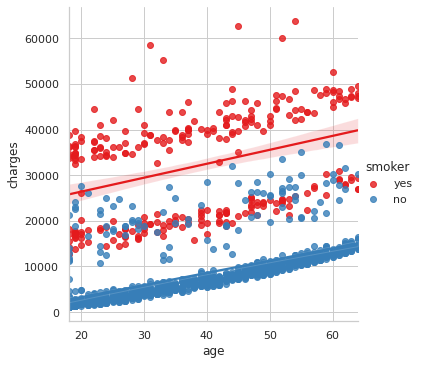

In [15]:
# smokers prone to pay more in age group
ax = sns.lmplot(x="age", y="charges", data=data, hue="smoker", palette="Set1")

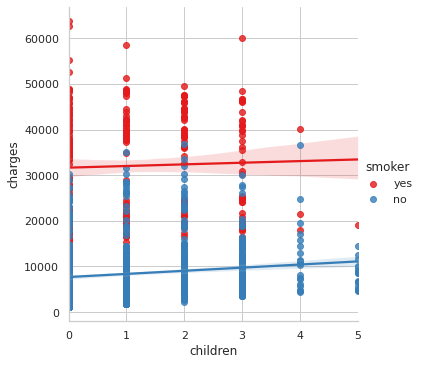

In [16]:
# children not cause of higher charges
ax = sns.lmplot(x="children", y="charges", hue="smoker", data=data, palette="Set1")

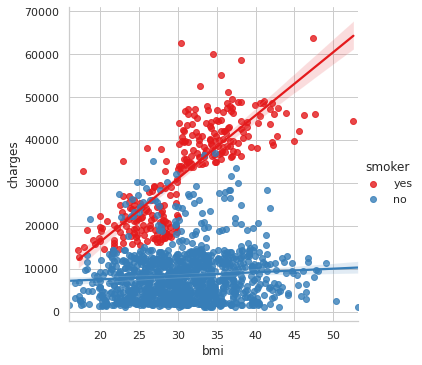

In [17]:
# Smokers with high bmi are charged more than none smokers
ax = sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette="Set1")

# Pre-process data
- [Encode categorical](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02) 
- [Normalize Charges](https://www.codecademy.com/articles/normalization#:~:text=Min%2Dmax%20normalization%20is%20one,decimal%20between%200%20and%201.&text=That%20data%20is%20just%20as%20squished%20as%20before!)


### Nominal features

- sex
- region
- children

### Ordinal

- smoker


In [18]:
import pipeline.insurance as pip_ins
importlib.reload(pip_ins)

<module 'pipeline.insurance' from '/home/jovyan/work/dataset_exploration/../../modules/pipeline/insurance.py'>

In [19]:
preprocessed_data = pip_ins.preprocess(data)
preprocessed_data.head()

,age,bmi,children,smoker,charges
0,0.021739,0.321227,0.179479,1,0.251611
1,0.000000,0.479150,0.185308,0,0.009636
2,0.217391,0.458434,0.227195,0,0.053115
3,0.326087,0.181464,0.179479,0,0.333010
4,0.304348,0.347592,0.179479,0,0.043816


# Check corelations

In [21]:
preprocessed_data.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.060272,-0.025019,0.299008
bmi,0.109272,1.000000,0.027919,0.003750,0.198341
children,0.060272,0.027919,1.000000,0.056504,0.110565
smoker,-0.025019,0.003750,0.056504,1.000000,0.787251
charges,0.299008,0.198341,0.110565,0.787251,1.000000


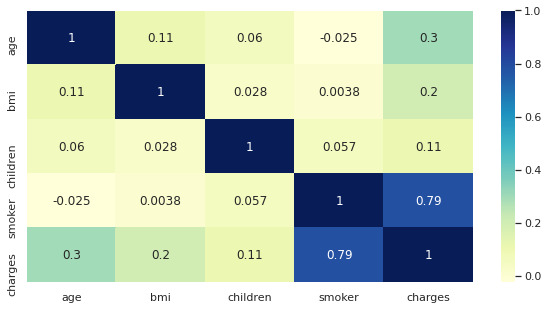

In [24]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.heatmap(preprocessed_data.corr(), annot=True, cmap="YlGnBu")

## Check distribution of data

In [25]:
preprocessed_data.columns

Index(['age', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

Text(0.5, 1.0, 'Distribution of bmi')

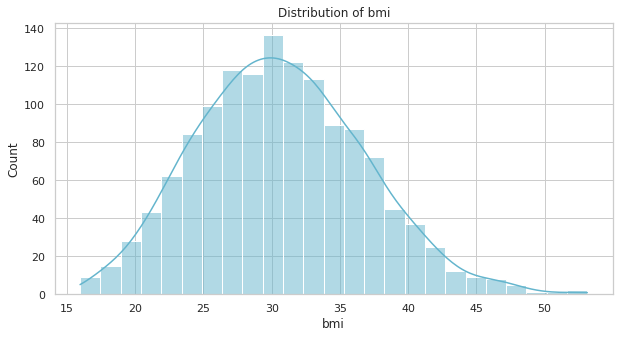

In [26]:
sns.set(style="whitegrid")
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.histplot(data["bmi"], kde = True, color = "c")
plt.title("Distribution of bmi")

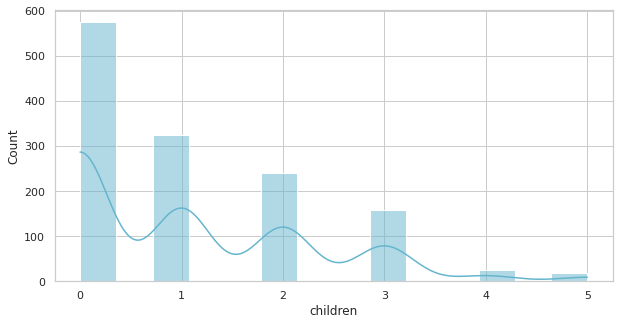

In [27]:
sns.set(style="whitegrid")
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.histplot(data["children"], kde = True, color = "c")

Text(0.5, 1.0, 'Distribution of age')

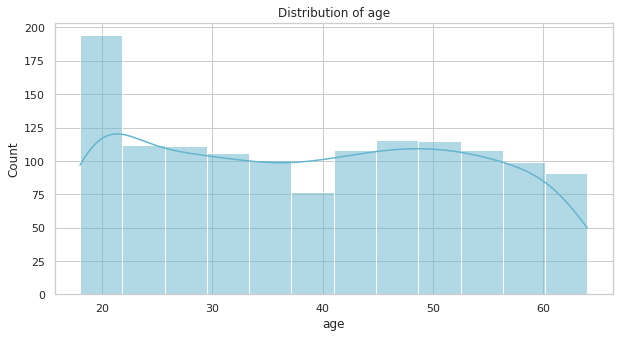

In [28]:
sns.set(style="whitegrid")
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.histplot(data["age"], kde = True, color = "c")
plt.title("Distribution of age")

## Uncertainty with linear regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
# max likelihood estimation
linear = LinearRegression(fit_intercept=True).fit(preprocessed_data.iloc[:, :-1], preprocessed_data["charges"])

## Linear regression

In [43]:
clean_data = preprocessed_data
(X_train, X_test, y_train, y_test) = train_test_split(clean_data.iloc[:, :-1], clean_data["charges"], train_size=.90)

In [44]:
print(X_train.shape)
print(X_test.shape)

(1204, 4)
(134, 4)


In [45]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_model.score(X_test, y_test)

0.7390036874822586

In [47]:
lin_model.predict(X_test.iloc[:1])

array([0.10839457])

In [42]:
y_test.iloc[0]

0.028428949802621388